## **EMPLOYEE PERFORMANCE ANALYSIS**

INX Future Inc.

Candidate Name      : Kajal Kumari S

Module              : Certified Data Scientist - Project

Submission Deadline Date:   06-aug-2023

 * GIVEN STUDY CASE:

  * The data is based on INX Future Inc, (referred as INX ). It is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 years.

  * Recent years, the employee performance indexes are not healthy and this is becoming a growing concerns among the top management. There has been increased escalations on service delivery and client satisfaction levels came down by 8 percentage points.

  * CEO, Mr. Brain, knows the issues but concerned to take any actions in penalizing non-performing employees as this would affect the employee morale of all the employees in general and may further reduce the performance. Also, the market perception best employer and thereby attracting best talents to join the company.  Mr. Brain decided to initiate a data science project , which analyses the current employee data and find the core underlying causes of this performance issues.
  
  * Mr. Brain, being a data scientist himself, expects the findings of this project will help him to take right course of actions. He also expects a clear indicators of non performing employees, so that any penalization  of non-performing employee, if required, may not significantly affect other employee morals.

* LIBRARIES TO BE IMPORTED

In [301]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import  XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE


* Ignoring Warnings:

In [144]:
import warnings
warnings.filterwarnings( 'ignore')

In [145]:
pd.set_option('display.max_columns',None)

In [146]:
data1= pd.read_excel('/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

In [147]:
data1

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3


* **Basic checks**:

In [148]:
data1.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [149]:
data1.tail()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
1195,E100992,27,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,3,1,4,71,4,2,4,1,Yes,20,2,6,3,3,6,5,0,4,No,4
1196,E100993,37,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,10,2,4,80,4,1,4,3,No,17,1,4,2,3,1,0,0,0,No,3
1197,E100994,50,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,28,1,4,74,4,1,3,1,Yes,11,3,20,3,3,20,8,3,8,No,3
1198,E100995,34,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,9,3,4,46,2,3,2,1,No,14,2,9,3,4,8,7,7,7,No,3
1199,E100998,24,Female,Life Sciences,Single,Sales,Sales Executive,Travel_Rarely,3,2,1,65,3,2,3,9,No,14,1,4,3,3,2,2,2,0,Yes,2


In [150]:
data1.head().T

,0,1,2,3,4
EmpNumber,E1001000,E1001006,E1001007,E1001009,E1001010
Age,32,47,40,41,60
Gender,Male,Male,Male,Male,Male
EducationBackground,Marketing,Marketing,Life Sciences,Human Resources,Marketing
MaritalStatus,Single,Single,Married,Divorced,Single
EmpDepartment,Sales,Sales,Sales,Human Resources,Sales
EmpJobRole,Sales Executive,Sales Executive,Sales Executive,Manager,Sales Executive
BusinessTravelFrequency,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely,Travel_Rarely
DistanceFromHome,10,14,5,10,16
EmpEducationLevel,3,4,4,4,4


In [151]:
data1.shape

(1200, 28)

In [152]:
data1.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [153]:
data1.dtypes

EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

In [154]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [155]:
data1.nunique()

EmpNumber                       1200
Age                               43
Gender                             2
EducationBackground                6
MaritalStatus                      3
EmpDepartment                      6
EmpJobRole                        19
BusinessTravelFrequency            3
DistanceFromHome                  29
EmpEducationLevel                  5
EmpEnvironmentSatisfaction         4
EmpHourlyRate                     71
EmpJobInvolvement                  4
EmpJobLevel                        5
EmpJobSatisfaction                 4
NumCompaniesWorked                10
OverTime                           2
EmpLastSalaryHikePercent          15
EmpRelationshipSatisfaction        4
TotalWorkExperienceInYears        40
TrainingTimesLastYear              7
EmpWorkLifeBalance                 4
ExperienceYearsAtThisCompany      37
ExperienceYearsInCurrentRole      19
YearsSinceLastPromotion           16
YearsWithCurrManager              18
Attrition                          2
P

In [156]:
data1.duplicated().sum()

0

In [157]:
data1.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

**Numerical features**

In [158]:
num_data = data1[['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears',
              'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsSinceLastPromotion',
              'YearsWithCurrManager']]
num_data

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,32,10,55,1,12,10,2,10,7,0,8
1,47,14,42,2,12,20,2,7,7,1,7
2,40,5,48,5,21,20,2,18,13,1,12
3,41,10,73,3,15,23,2,21,6,12,6
4,60,16,84,8,14,10,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1195,27,3,71,1,20,6,3,6,5,0,4
1196,37,10,80,3,17,4,2,1,0,0,0
1197,50,28,74,1,11,20,3,20,8,3,8
1198,34,9,46,1,14,9,3,8,7,7,7


**Checking for above data distribution**

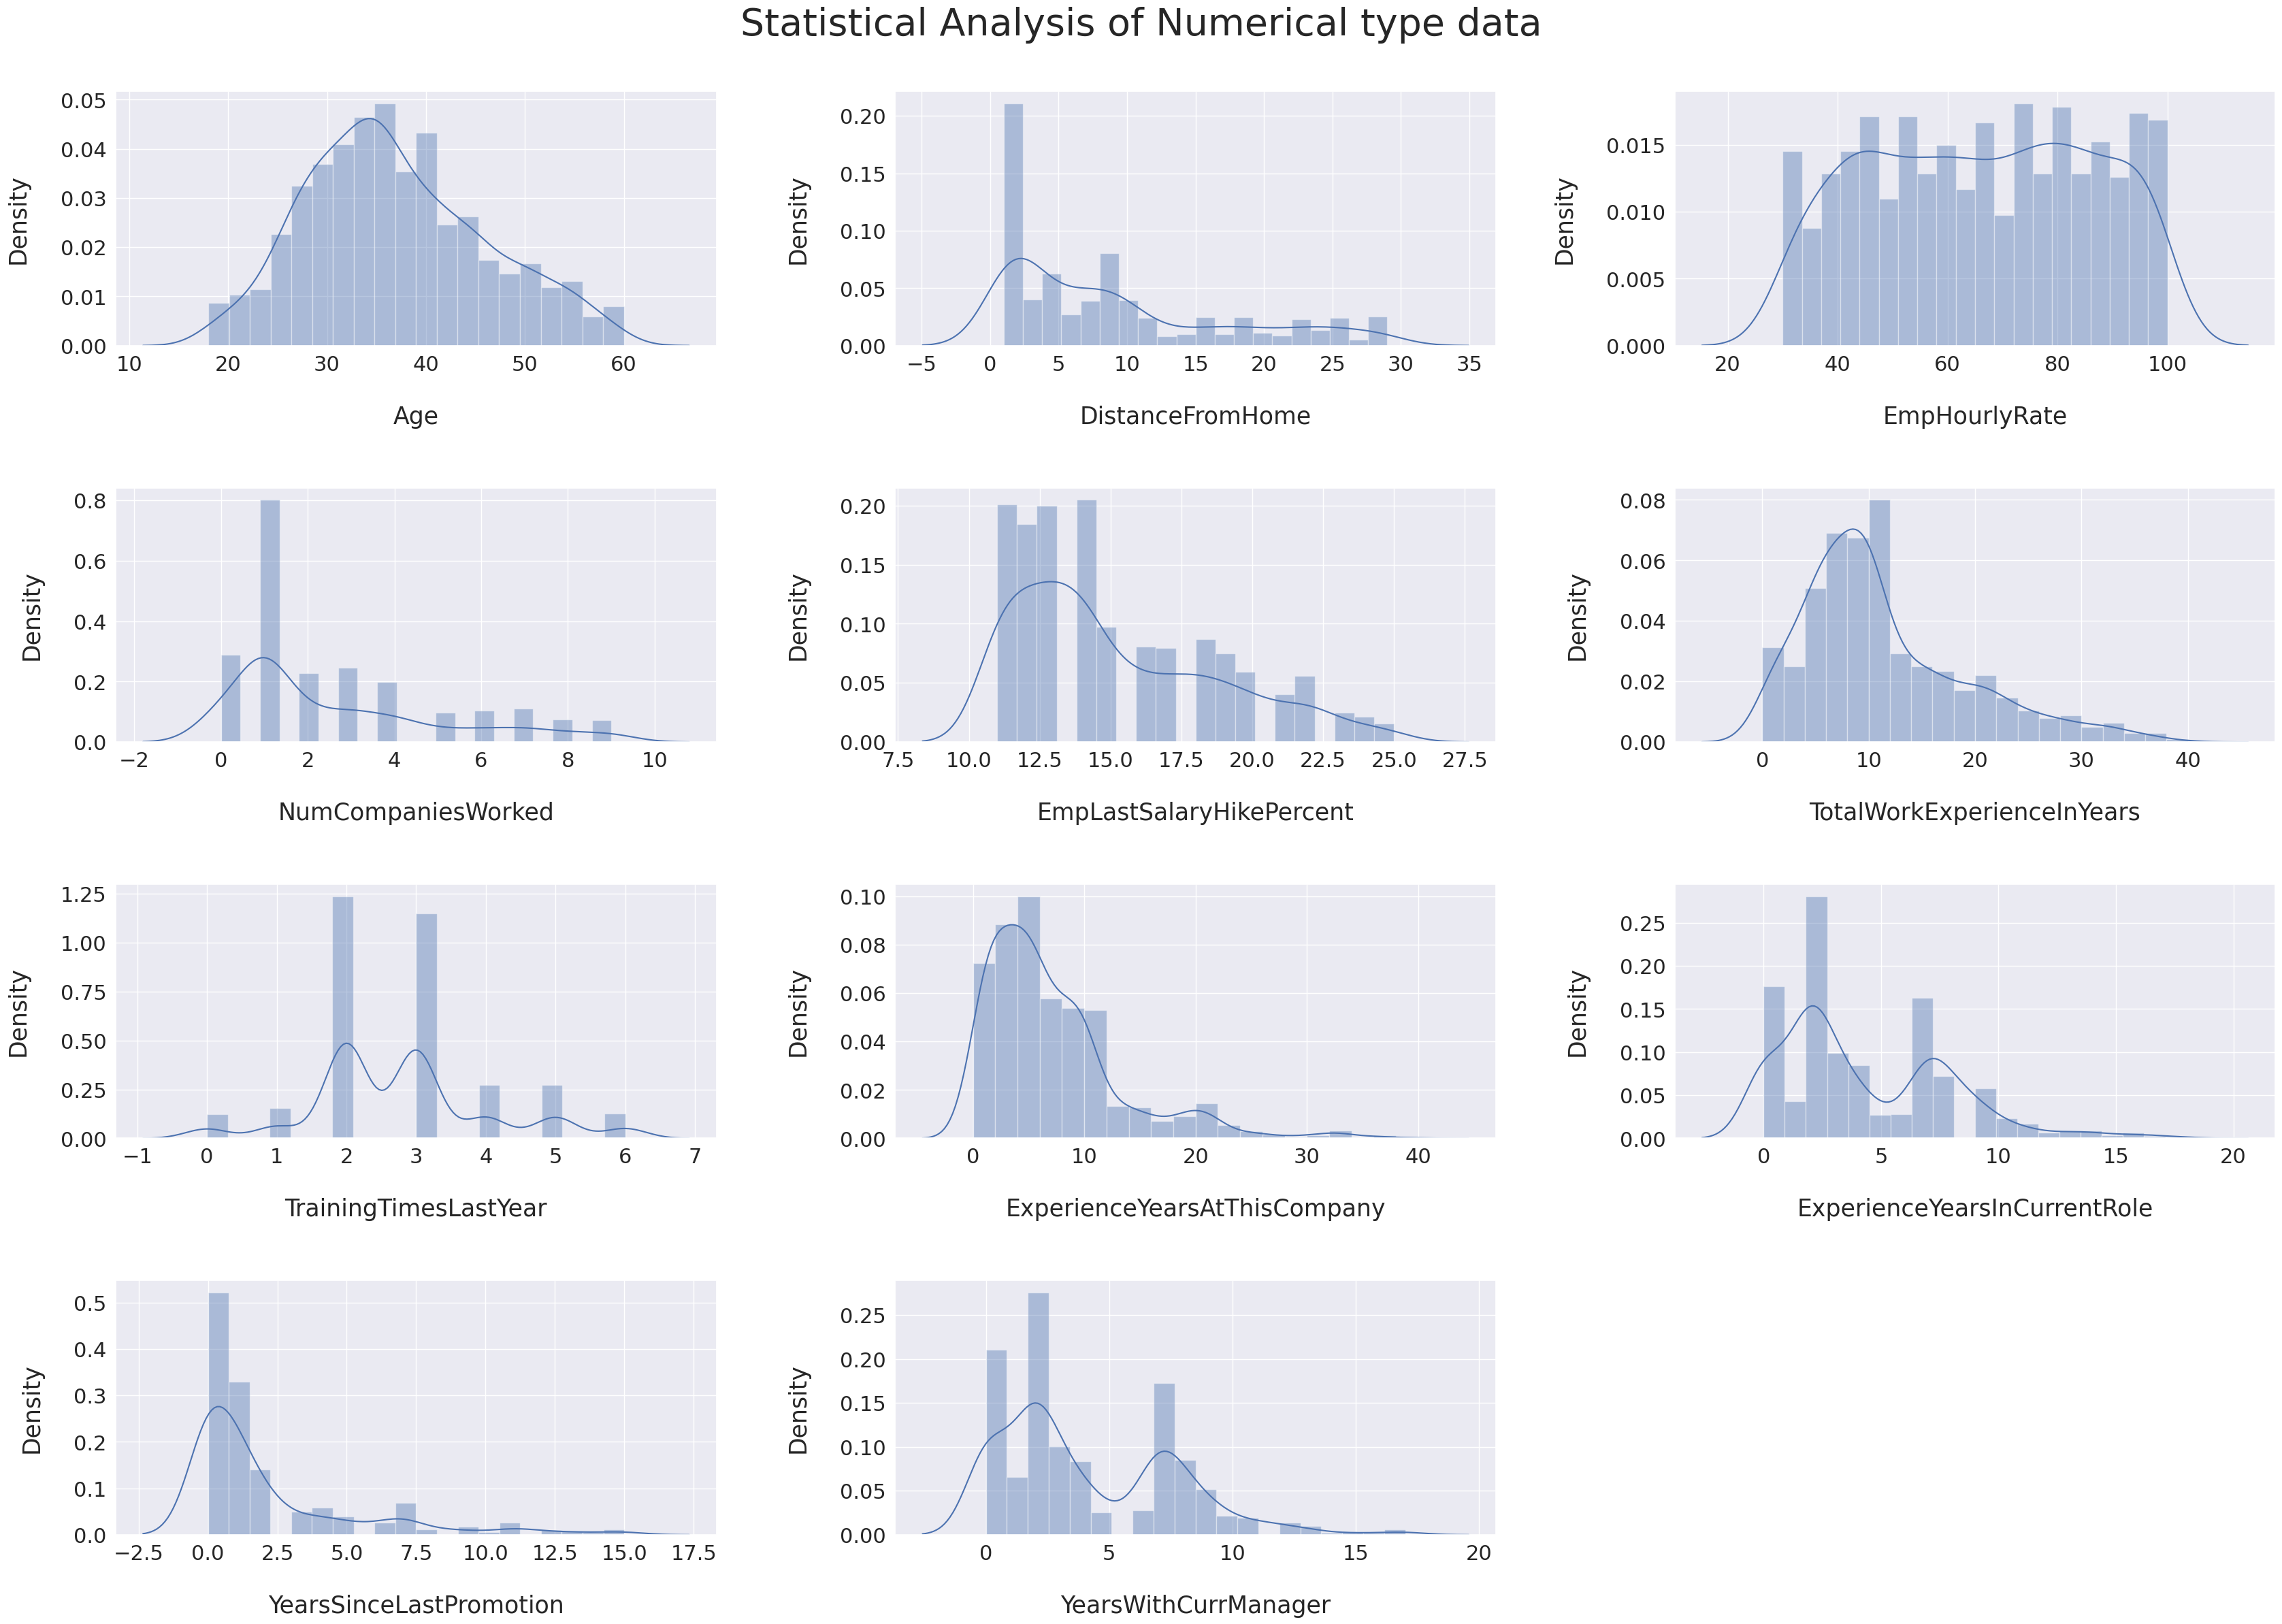

In [159]:
sns.set(rc={"font.size":15,"axes.titlesize":15,"axes.labelsize":22,"xtick.labelsize":22,"ytick.labelsize":22,
            "legend.fontsize":12})

fig = plt.figure(figsize=(35,25))
fig.suptitle("Statistical Analysis of Numerical type data", fontsize=40)
for index,col in enumerate(num_data):
    plt.subplot(4,3,index+1)
    sns.distplot(num_data.loc[:,col].dropna(),kde=True,bins=20)
    plt.xlabel(f"\n{col}",fontsize=25)
    plt.ylabel("Density\n",fontsize=25)
fig.tight_layout(pad=4.0)
fig.subplots_adjust(top=0.93)


**Checking for skewness**

In [160]:
from scipy.stats import skew, kurtosis
def skewedness(data):
    skewed=[]
    for col in data:
        sk=data[col].skew()
        if(sk>=1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed


print(f"\033[1mSkewed Column name : {skewedness(num_data)}")
print('\033[1mRange of skewness & kurtosis, S < |1.96|')
# Checking Kurtosis
print('\033[1mSkewness for YearsSinceLastPromotion:',skew(data1['YearsSinceLastPromotion']))
print('\033[1mKurtosis for YearsSinceLastPromotion:',kurtosis(data1['YearsSinceLastPromotion']))

Skewed Column name : ['YearsSinceLastPromotion']
Range of skewness & kurtosis, S < |1.96|
Skewness for YearsSinceLastPromotion: 1.9724620367914252
Kurtosis for YearsSinceLastPromotion: 3.5193552691799805


 **Visualizing above skewness**

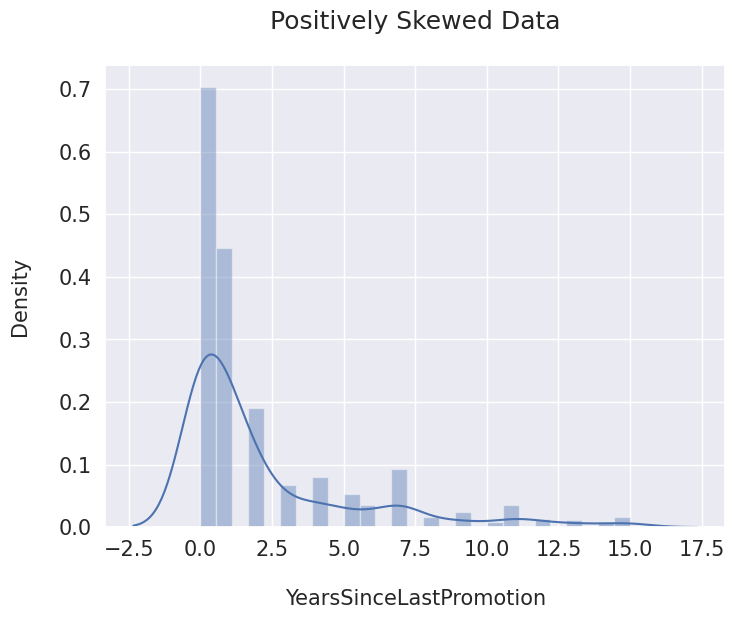

In [161]:
sns.set(rc={"font.size":15,"axes.titlesize":17,"axes.labelsize":15,"xtick.labelsize":15,"ytick.labelsize":15,
            "legend.fontsize":12})
plt.figure(figsize=(8,6))
sns.distplot(num_data['YearsSinceLastPromotion'])
plt.xlabel("\nYearsSinceLastPromotion")
plt.ylabel("Density\n")
plt.title("Positively Skewed Data\n",fontsize="18")
plt.show()

In [162]:
num_data['YearsSinceLastPromotion'] = np.sqrt(num_data['YearsSinceLastPromotion'])

After skewness:

In [163]:
num_data['YearsSinceLastPromotion'].skew()

0.7350121906940618

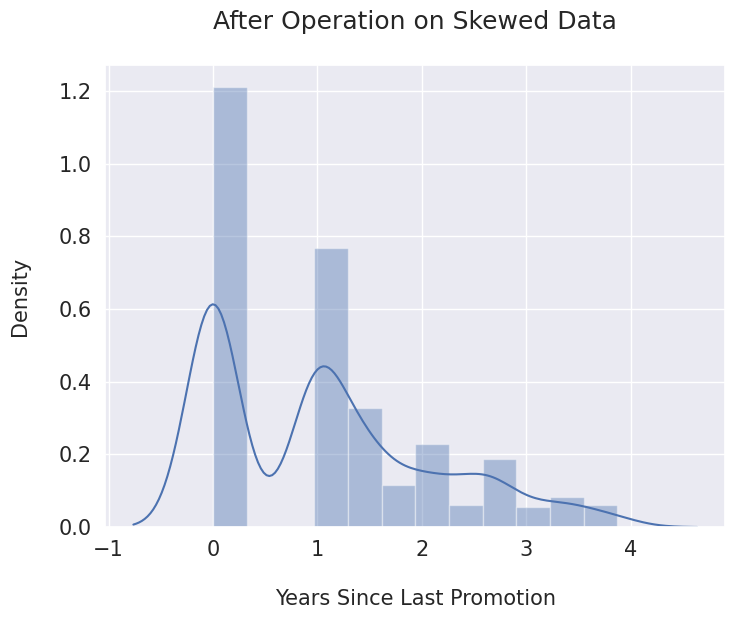

In [164]:
sns.set(rc={"font.size":15,"axes.titlesize":17,"axes.labelsize":15,"xtick.labelsize":15,"ytick.labelsize":15,
            "legend.fontsize":12})
plt.figure(figsize=(8,6))
sns.distplot(num_data['YearsSinceLastPromotion'])
plt.xlabel("\nYears Since Last Promotion")
plt.ylabel("Density\n")
plt.title("After Operation on Skewed Data\n",fontsize=18)
plt.show()


**Categorical Features**

In [165]:
obj_data = data1.select_dtypes(include="object")
obj_data

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
0,E1001000,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
1,E1001006,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
2,E1001007,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,Yes,No
3,E1001009,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,No,No
4,E1001010,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,No,No
...,...,...,...,...,...,...,...,...,...
1195,E100992,Female,Medical,Divorced,Sales,Sales Executive,Travel_Frequently,Yes,No
1196,E100993,Male,Life Sciences,Single,Development,Senior Developer,Travel_Rarely,No,No
1197,E100994,Male,Medical,Married,Development,Senior Developer,Travel_Rarely,Yes,No
1198,E100995,Female,Medical,Single,Data Science,Data Scientist,Travel_Rarely,No,No


* Checking outliers

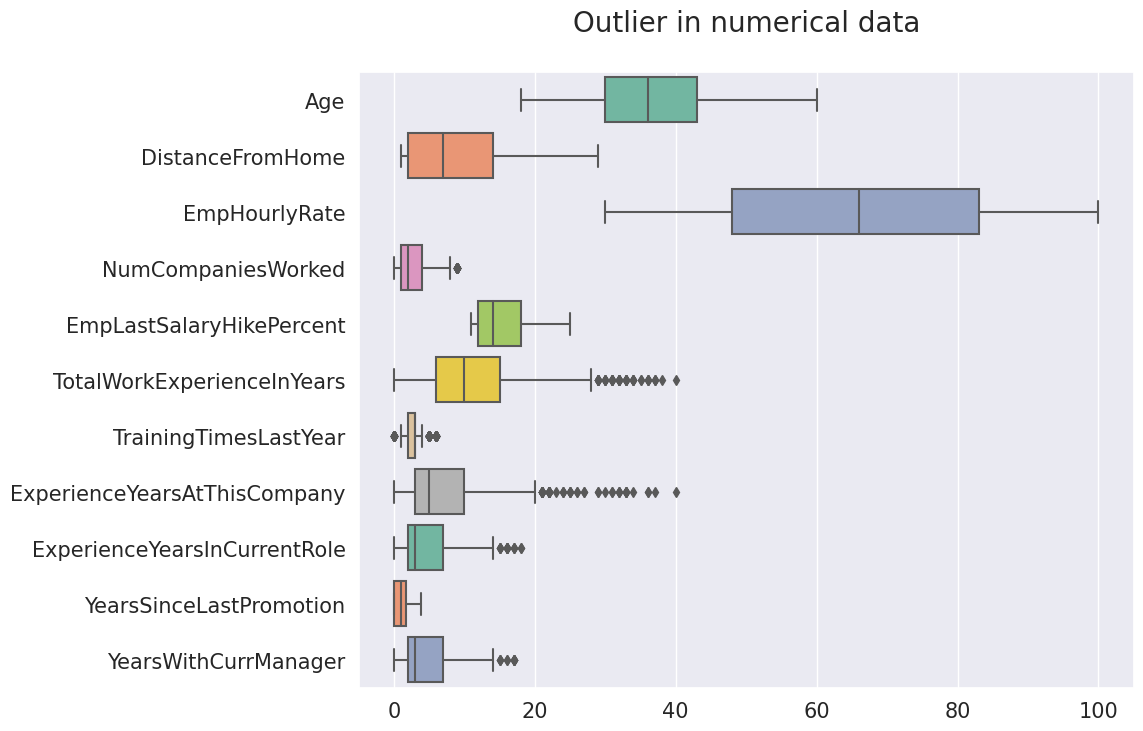

In [166]:
plt.figure(figsize=(10,8))
sns.boxplot(data=num_data, orient="h", palette="Set2")
plt.title("Outlier in numerical data\n",fontsize=20)
plt.show()

Columns with outliers:

  * Number of Companies Worked

  * Total Work Experience In Years
  * Training Times Last Year
  * Experience Years At This Company
  * Experience Years In CurrentRole
  * Years With Curr Manager

In [167]:
num_data.columns

Index(['Age', 'DistanceFromHome', 'EmpHourlyRate', 'NumCompaniesWorked',
       'EmpLastSalaryHikePercent', 'TotalWorkExperienceInYears',
       'TrainingTimesLastYear', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Number of Companies Worked

In [168]:
print(f"\033[1m 10% quantile of Number of Companies Worked : {num_data['NumCompaniesWorked'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Number of Companies Worked : {num_data['NumCompaniesWorked'].quantile(0.90)}")

 10% quantile of Number of Companies Worked : 0.0
 90% quantile of Number of Companies Worked : 7.0


In [169]:
num_data["NumCompaniesWorked"] = np.where(num_data["NumCompaniesWorked"] >7.0, 7.0,num_data['NumCompaniesWorked'])
t=skew(num_data["NumCompaniesWorked"])
print("\033[1m Skewness of Number of Companies Worked : {}".format(t))

 Skewness of Number of Companies Worked : 0.8140421709832787


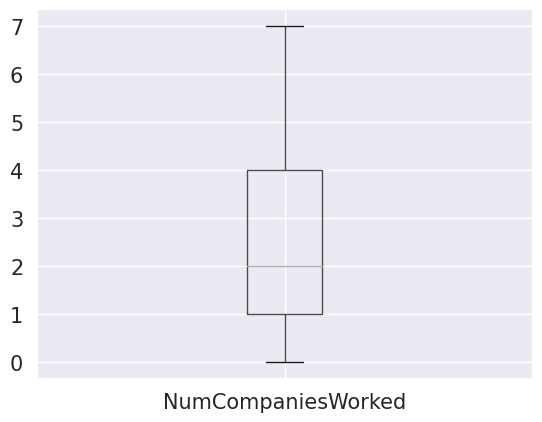

In [170]:
plt.show(num_data.boxplot("NumCompaniesWorked"))

In [171]:
print(f"\033[1m 10% quantile of Total Work Experience In Years : {num_data['TotalWorkExperienceInYears'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Total Work Experience In Years : {num_data['TotalWorkExperienceInYears'].quantile(0.90)}")

 10% quantile of Total Work Experience In Years : 3.0
 90% quantile of Total Work Experience In Years : 23.0


In [172]:
num_data["TotalWorkExperienceInYears"] = np.where(num_data["TotalWorkExperienceInYears"] >23.0, 23.0,num_data['TotalWorkExperienceInYears'])
t=skew(num_data["TotalWorkExperienceInYears"])
print("\033[1m Skewness of Total Work Experience In Yearsd : {}".format(t))

 Skewness of Total Work Experience In Yearsd : 0.5337701681831295


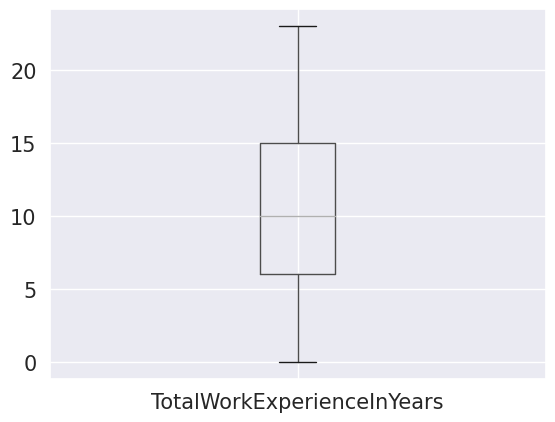

In [173]:
plt.show(num_data.boxplot("TotalWorkExperienceInYears"))

In [174]:
print(f"\033[1m 10% quantile of Training Times Last Year : {num_data['TrainingTimesLastYear'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Training Times Last Year : {num_data['TrainingTimesLastYear'].quantile(0.90)}")

 10% quantile of Training Times Last Year : 2.0
 90% quantile of Training Times Last Year : 5.0


In [175]:
num_data["TrainingTimesLastYear"] = np.where(num_data["TrainingTimesLastYear"] <1.0, 1.0,num_data['TrainingTimesLastYear'])
num_data["TrainingTimesLastYear"] = np.where(num_data["TrainingTimesLastYear"] >4.0, 4.0,num_data['TrainingTimesLastYear'])
t=skew(num_data["TrainingTimesLastYear"])
print("\033[1m Skewness of Training Times Last Year : {}".format(t))

 Skewness of Training Times Last Year : 0.0014732709380578283


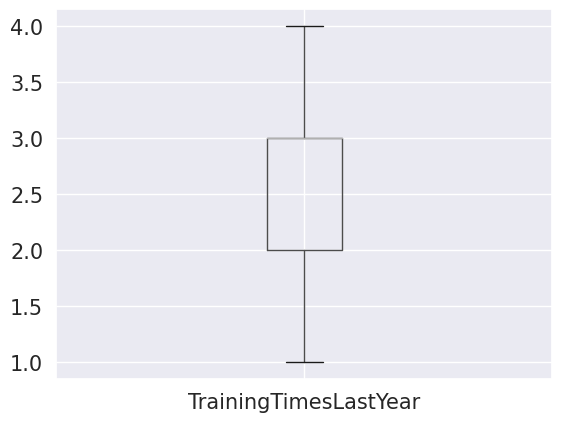

In [176]:
plt.show(num_data.boxplot("TrainingTimesLastYear"))

In [177]:
print(f"\033[1m 10% quantile of Experience Years At This Company : {num_data['ExperienceYearsAtThisCompany'].quantile(0.10)}")
print(f"\033[1m 10% quantile of Experience Years At This Company : {num_data['ExperienceYearsAtThisCompany'].quantile(0.90)}")

 10% quantile of Experience Years At This Company : 1.0
 10% quantile of Experience Years At This Company : 15.0


In [178]:
num_data["ExperienceYearsAtThisCompany"] = np.where(num_data["ExperienceYearsAtThisCompany"] >15.0, 15.0,num_data['ExperienceYearsAtThisCompany'])
t=skew(num_data["ExperienceYearsAtThisCompany"])
print("\033[1m Skewness of Experience Years At This Company : {}".format(t))

 Skewness of Experience Years At This Company : 0.573319644340013


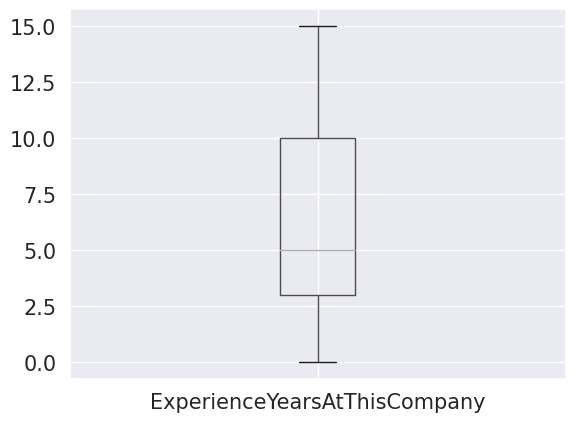

In [179]:
plt.show(num_data.boxplot("ExperienceYearsAtThisCompany"))

In [180]:
print(f"\033[1m 10% quantile of Experience Years In Current Role : {num_data['ExperienceYearsInCurrentRole'].quantile(0.10)}")
print(f"\033[1m 90% quantile of Experience Years In Current Role : {num_data['ExperienceYearsInCurrentRole'].quantile(0.90)}")

 10% quantile of Experience Years In Current Role : 0.0
 90% quantile of Experience Years In Current Role : 9.0


In [181]:
num_data["ExperienceYearsInCurrentRole"] = np.where(num_data["ExperienceYearsInCurrentRole"] >9.0, 9.0,num_data['ExperienceYearsInCurrentRole'])
t=skew(num_data["ExperienceYearsInCurrentRole"])
print("\033[1m Skewness of Experience Years In Current Role : {}".format(t))

 Skewness of Experience Years In Current Role : 0.3070756306977393


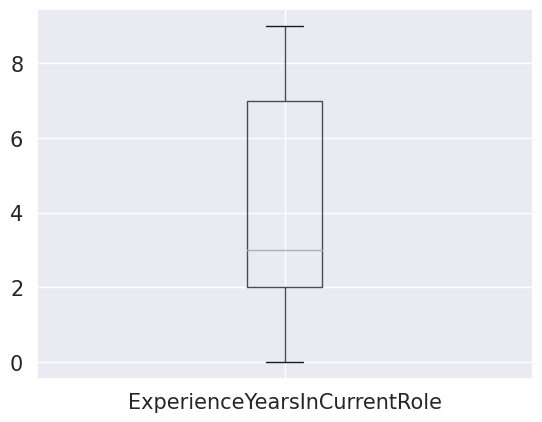

In [182]:
plt.show(num_data.boxplot("ExperienceYearsInCurrentRole"))

In [183]:
print(f"\033[1m 10% quantile of Years With Curr Manager : {num_data['YearsWithCurrManager'].quantile(0.10)}")
print(f"\033[1m 10% quantile of Years With Curr Manager : {num_data['YearsWithCurrManager'].quantile(0.90)}")

 10% quantile of Years With Curr Manager : 0.0
 10% quantile of Years With Curr Manager : 9.0


In [184]:
num_data["YearsWithCurrManager"] = np.where(num_data["YearsWithCurrManager"] >9.0, 9.0,num_data['YearsWithCurrManager'])
t=skew(num_data["YearsWithCurrManager"])
print("\033[1m Skewness of Years With Curr Manager : {}".format(t))

 Skewness of Years With Curr Manager : 0.3378734233306521


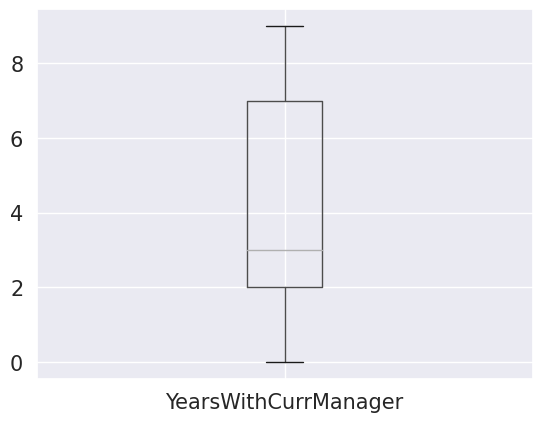

In [185]:
plt.show(num_data.boxplot("YearsWithCurrManager"))

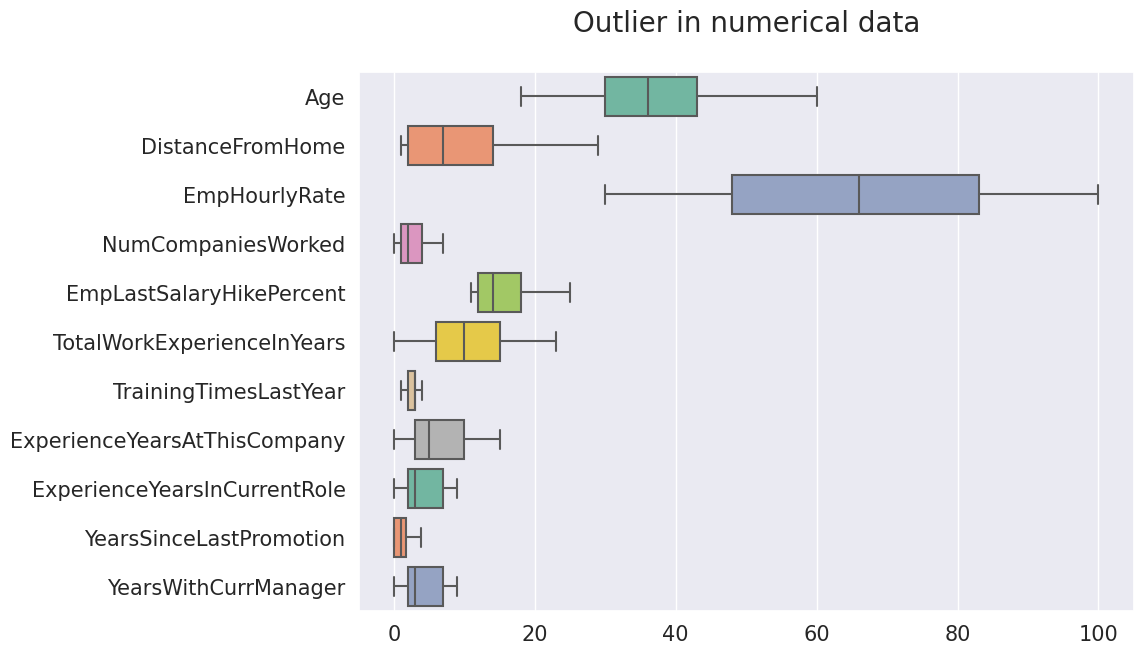

In [186]:
plt.figure(figsize=(10,7))
sns.boxplot(data=num_data, orient="h", palette="Set2")
plt.title("Outlier in numerical data\n",fontsize=20)
plt.show()

* **DATA ANALYSIS**

In [187]:
department_statistics = data1.groupby('EmpDepartment')['PerformanceRating'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])


In [188]:
department_statistics

,mean,median,std,min,max,count
EmpDepartment,,,,,,
Data Science,3.050000,3.0,0.394034,2,4,20
Development,3.085873,3.0,0.388508,2,4,361
Finance,2.775510,3.0,0.586846,2,4,49
Human Resources,2.925926,3.0,0.544331,2,4,54
Research & Development,2.921283,3.0,0.559016,2,4,343
Sales,2.860590,3.0,0.555400,2,4,373


* INSIGHTS FROM ABOVE STATS:
  
  * Data Science -  It has a narrow range of performance ratings **(from 2 to 4)**
           
  * **Low standard deviation**, indicates more consistent performance level compared to other departments.

  * Development, Research & Development, and Sales -They have **highest number of employees**
  * Finance and Human Resources -It has the **lowest average and median** ratings among all departments.

**EXPLARATORY DATA ANALYSIS**:

FEATURES:
* AGE :          
 - Age of the employee
* GENDER :
 - Gender of the employee
* EDUCATION BACKGROUND :
 - Education background of the employee
* MARITAL STATUS:
 - Whether the employee is married or not.
* EMP DEPARTMENT:
 - Department employee belongs to
* EMP JOB ROLE:
 - Job role assigned to employee
* BUSINESS TRAVEL FREQUENCY:
 - How often employee travelled for business purpose
* DISTANCE FROM HOME:
 - Total distance travelled from home
* EMP EDUCATION LEVEL:
 - Employee's level of graduation
* EMP ENVIRONMENT SATISFACTION:
 - Employee's level of satisfaction with the working environment
* EMP HOURLY RATE:
 - Hourly ratings of the employee
* EMP JOB INVOLVEMENT:
 - Employee's job involvement into the job
* EMP JOB LEVEL:
 - Job level in which employee is working
* EMP JOB SATISFACTION:
 - Whether the employee is happy with the job or not
* NUM COMPANIES WORKED:
  - Total number companies, employee worked with
* OVER TIME:
 - Employee working over time or not
* EMP LAST SALARY HIKE PERCENT:
  - Percentage of hike from previous salary given to the employee
* EMP RELATIONSHIP SATISFACTION:
  - Employee's relationship with other colleagues
* TOTAL WORK EXPERIENCE IN YEARS:
  - Employee's total work experience in years
* TRAINING TIMES LAST YEAR:
  - Training given to the emoployees last year
*  EMP WORK LIFE BALANCE:
  - Work life balance of the employee
* EXPERIENCE YEARS AT THIS COMPANY
  - Total experience gained by the employee in this company   
* EXPERIENCE YEARS IN THE CURRENT ROLE :
  - Total experience gained by the employee in the current role.
* YEARS SINCE LAST PROMOTION:
  - No of years of employee after last promotion
* YEARS WITH CURR MANAGER:
  - No of years of connection with the current manager
* ATTRITION:
  - Departure of employees from the organisation
* PERFORMANCE RATING:
  - Ratings of employee's based on their performance

**UNIVARIATE ANALYSIS :**
  *  To check features using various statistical methods and visualizations
   
   *  Missing values
   * Outliers
   * Normal distribution - skewness and kurtosis

In [189]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 33.8 MB/s eta 0:00:00


In [190]:
import sweetviz as sv
report = sv.analyze(data1)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [191]:
data1.shape

(1200, 28)

In [192]:
data1.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

**INSIGHTS FROM UNIVARIATE ANALYSIS :**

*  **5.9% of employees**  age is around **34**.

*  Employees with age  **18** are the youngest employees.
* There are **3 employees** who are eldest among all employees
* Among 1200 employee's **60%** are male and rest is female employee's.
* **41%** of employee's education background is **life sience**.
* Only **2%** of employee is from **Human resource background**, which is 21 employees.
* **46%** of employees are married, **32%** employees are single, rest are devorced.
* Most of the employees are from **sales department**.
* Only **2%** of employees are from  **data science** department.
* **22%** of employees job role is **sales executive**
* Only **16 employees** hold bussiness analyst role in job, which is 1% of job roles.
* Among 1200 employees, **222** employees travel frequently, **70%** travel rarely
* **11%** are **Non travellers**, which is **132 employees**.
* **15.3%** of employee's are near to office.
* Employee's who travel from far are **1.9%**.
* Most of the employee's education level is **3**.
* **3** is the environment satisfaction level, given **367 employee's**, which is highest.
* **Only 6%** of employees made themself involved in job in best possible way.
* **37%** of employees are with job level **1 and 2**.
* Most of employees are not satisfied with their job.
* Only **36%** of employees(231) are satisfied with their job.
* Most of the employees(433) employees have worked only in **one company**.
* **29%** of employees work overtime, rest **847** employees dont.
* Most of the employees had **14%**  salary hike.
* **18%** of employees have good relationship with satus in the company.
* Most of the employees have **10 years** of experience, which is 159 employees.
* Most of the employees had **2 to 3 years** of training.Only **44 employees** did not get training from past years.
* Only **5%** of employees have very good work life balance.
* **12.7%** of employees have **5 years** of experience in the present company.
* **303 employees** have **2 years** of experience in their current role.
* **297 employees** are promoted since last 1 year.
* Most of the employees(281) are 2 years  with current manager.
* Only **15%** of employees were departured from the company.
* **16%** of employees performed well and **73%** have given moderate performance.

**BIVARIATE ANALYSIS**:

In [193]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [194]:
scatter_plot = px.scatter(data1, x='Age', y='EmpHourlyRate', title='Age with Hourly Rate')
scatter_plot.show()



* Many Employees **age around 34** has highest emphourlyrate of 93
* There is only one  youngest employee **age 19** has highest hourly rate of **97**  

In [195]:
box_plot = px.box(data1, x='EmpDepartment', y='Age', title= 'Age by Department')
box_plot.show()

* **Sales and Development department** has the youngest employees(18 years) as a fresher  compared to other departments.


 **DATA PREPROCESSING**

* Here we label encode columns with categorical data

*  Columns to be encoded for further analysis of dataset using label encodeing:

    * Gender
    * EducationalBackground
    * MaritalStatus
    * EmpDepartment
    * EmpJobRole
    * BusinessTravelFrequency
    * Attrition
* Here we also label encoding performance rating column, as the label gets started from 2,3,4, converting it to 0,1,2.

In [196]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [197]:
columns_to_be_labelled =['Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','OverTime','Attrition','PerformanceRating']

In [198]:
for column in columns_to_be_labelled:
    data1[column] = LE.fit_transform(data1[column])


In [199]:
data1

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,1
1,E1001006,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,1
2,E1001007,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,2
3,E1001009,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,1
4,E1001010,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,E100992,27,0,3,0,5,13,1,3,1,4,71,4,2,4,1,1,20,2,6,3,3,6,5,0,4,0,2
1196,E100993,37,1,1,2,1,15,2,10,2,4,80,4,1,4,3,0,17,1,4,2,3,1,0,0,0,0,1
1197,E100994,50,1,3,1,1,15,2,28,1,4,74,4,1,3,1,1,11,3,20,3,3,20,8,3,8,0,1
1198,E100995,34,0,3,2,0,1,2,9,3,4,46,2,3,2,1,0,14,2,9,3,4,8,7,7,7,0,1


In [200]:
data1.dtypes

EmpNumber                       object
Age                              int64
Gender                           int64
EducationBackground              int64
MaritalStatus                    int64
EmpDepartment                    int64
EmpJobRole                       int64
BusinessTravelFrequency          int64
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                         int64
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

* Performance rating:

In [201]:
pd.crosstab(data1['PerformanceRating'], data1['PerformanceRating'], margins=True)

PerformanceRating,0,1,2,All
PerformanceRating,,,,
0,194,0,0,194
1,0,874,0,874
2,0,0,132,132
All,194,874,132,1200


**MODELLING**:

* Splitting data into Training and Testing

In [202]:
data1.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,1
1,E1001006,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,1
2,E1001007,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,2
3,E1001009,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,1
4,E1001010,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,1


In [203]:
data1.PerformanceRating.unique()

array([1, 2, 0])

In [204]:
data1.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [205]:
X = data1[['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition']] # independent variable

In [206]:
Y = data1.PerformanceRating   # target variable

* X - Independent variables
* Y - Dependent variable

**Balancing the data**

In [241]:
Y.value_counts(normalize=True)*100

1    72.833333
0    16.166667
2    11.000000
Name: PerformanceRating, dtype: float64

* Data is imbalanced
* Using random oversampling technique to balance data

In [242]:
from imblearn.over_sampling import RandomOverSampler
oversampling = RandomOverSampler()
X_over, Y_over = oversampling.fit_resample(X, Y)


In [243]:
X_over = pd.DataFrame(X_over)
X_over.columns = ['Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition']
X_over

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0
1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0
2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0
3,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0
4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,31,1,1,0,5,8,2,7,3,3,44,2,3,4,9,0,21,3,10,3,2,5,4,0,1,0
2618,29,0,1,2,1,3,2,10,3,4,92,2,1,1,6,1,20,3,3,5,3,0,0,0,0,1
2619,42,1,2,2,5,13,2,4,4,2,45,3,2,1,7,0,13,4,9,3,4,6,4,1,5,0
2620,43,1,3,1,1,3,1,21,3,4,61,3,1,4,7,0,20,1,8,1,3,3,2,1,2,0


In [244]:
Y_over.value_counts(normalize=True)*100

1    33.333333
2    33.333333
0    33.333333
Name: PerformanceRating, dtype: float64

In [245]:
from scipy.stats import skew
def skewedness(data):
    skewed=[]
    for col in data:
        sk=skew(data[col])
        if(sk>1.96 or sk<=-1.96):
            skewed.append(col)
    return skewed

skewedness(X_over)

[]

Now data is balanced

* **FEATURE SELECTION:**

In [246]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2,k=15)
fit = bestfeatures.fit(X_over,Y_over)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_over.columns)

featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns = ['feature_names','Scores']

print(featurescores.nlargest(5,'Scores'))

                   feature_names       Scores
16      EmpLastSalaryHikePercent  1224.556861
23       YearsSinceLastPromotion   664.942657
9     EmpEnvironmentSatisfaction   478.083546
22  ExperienceYearsInCurrentRole   415.019140
21  ExperienceYearsAtThisCompany   386.066026


* Above features impact the target variable

**FEATURE SELECTION**

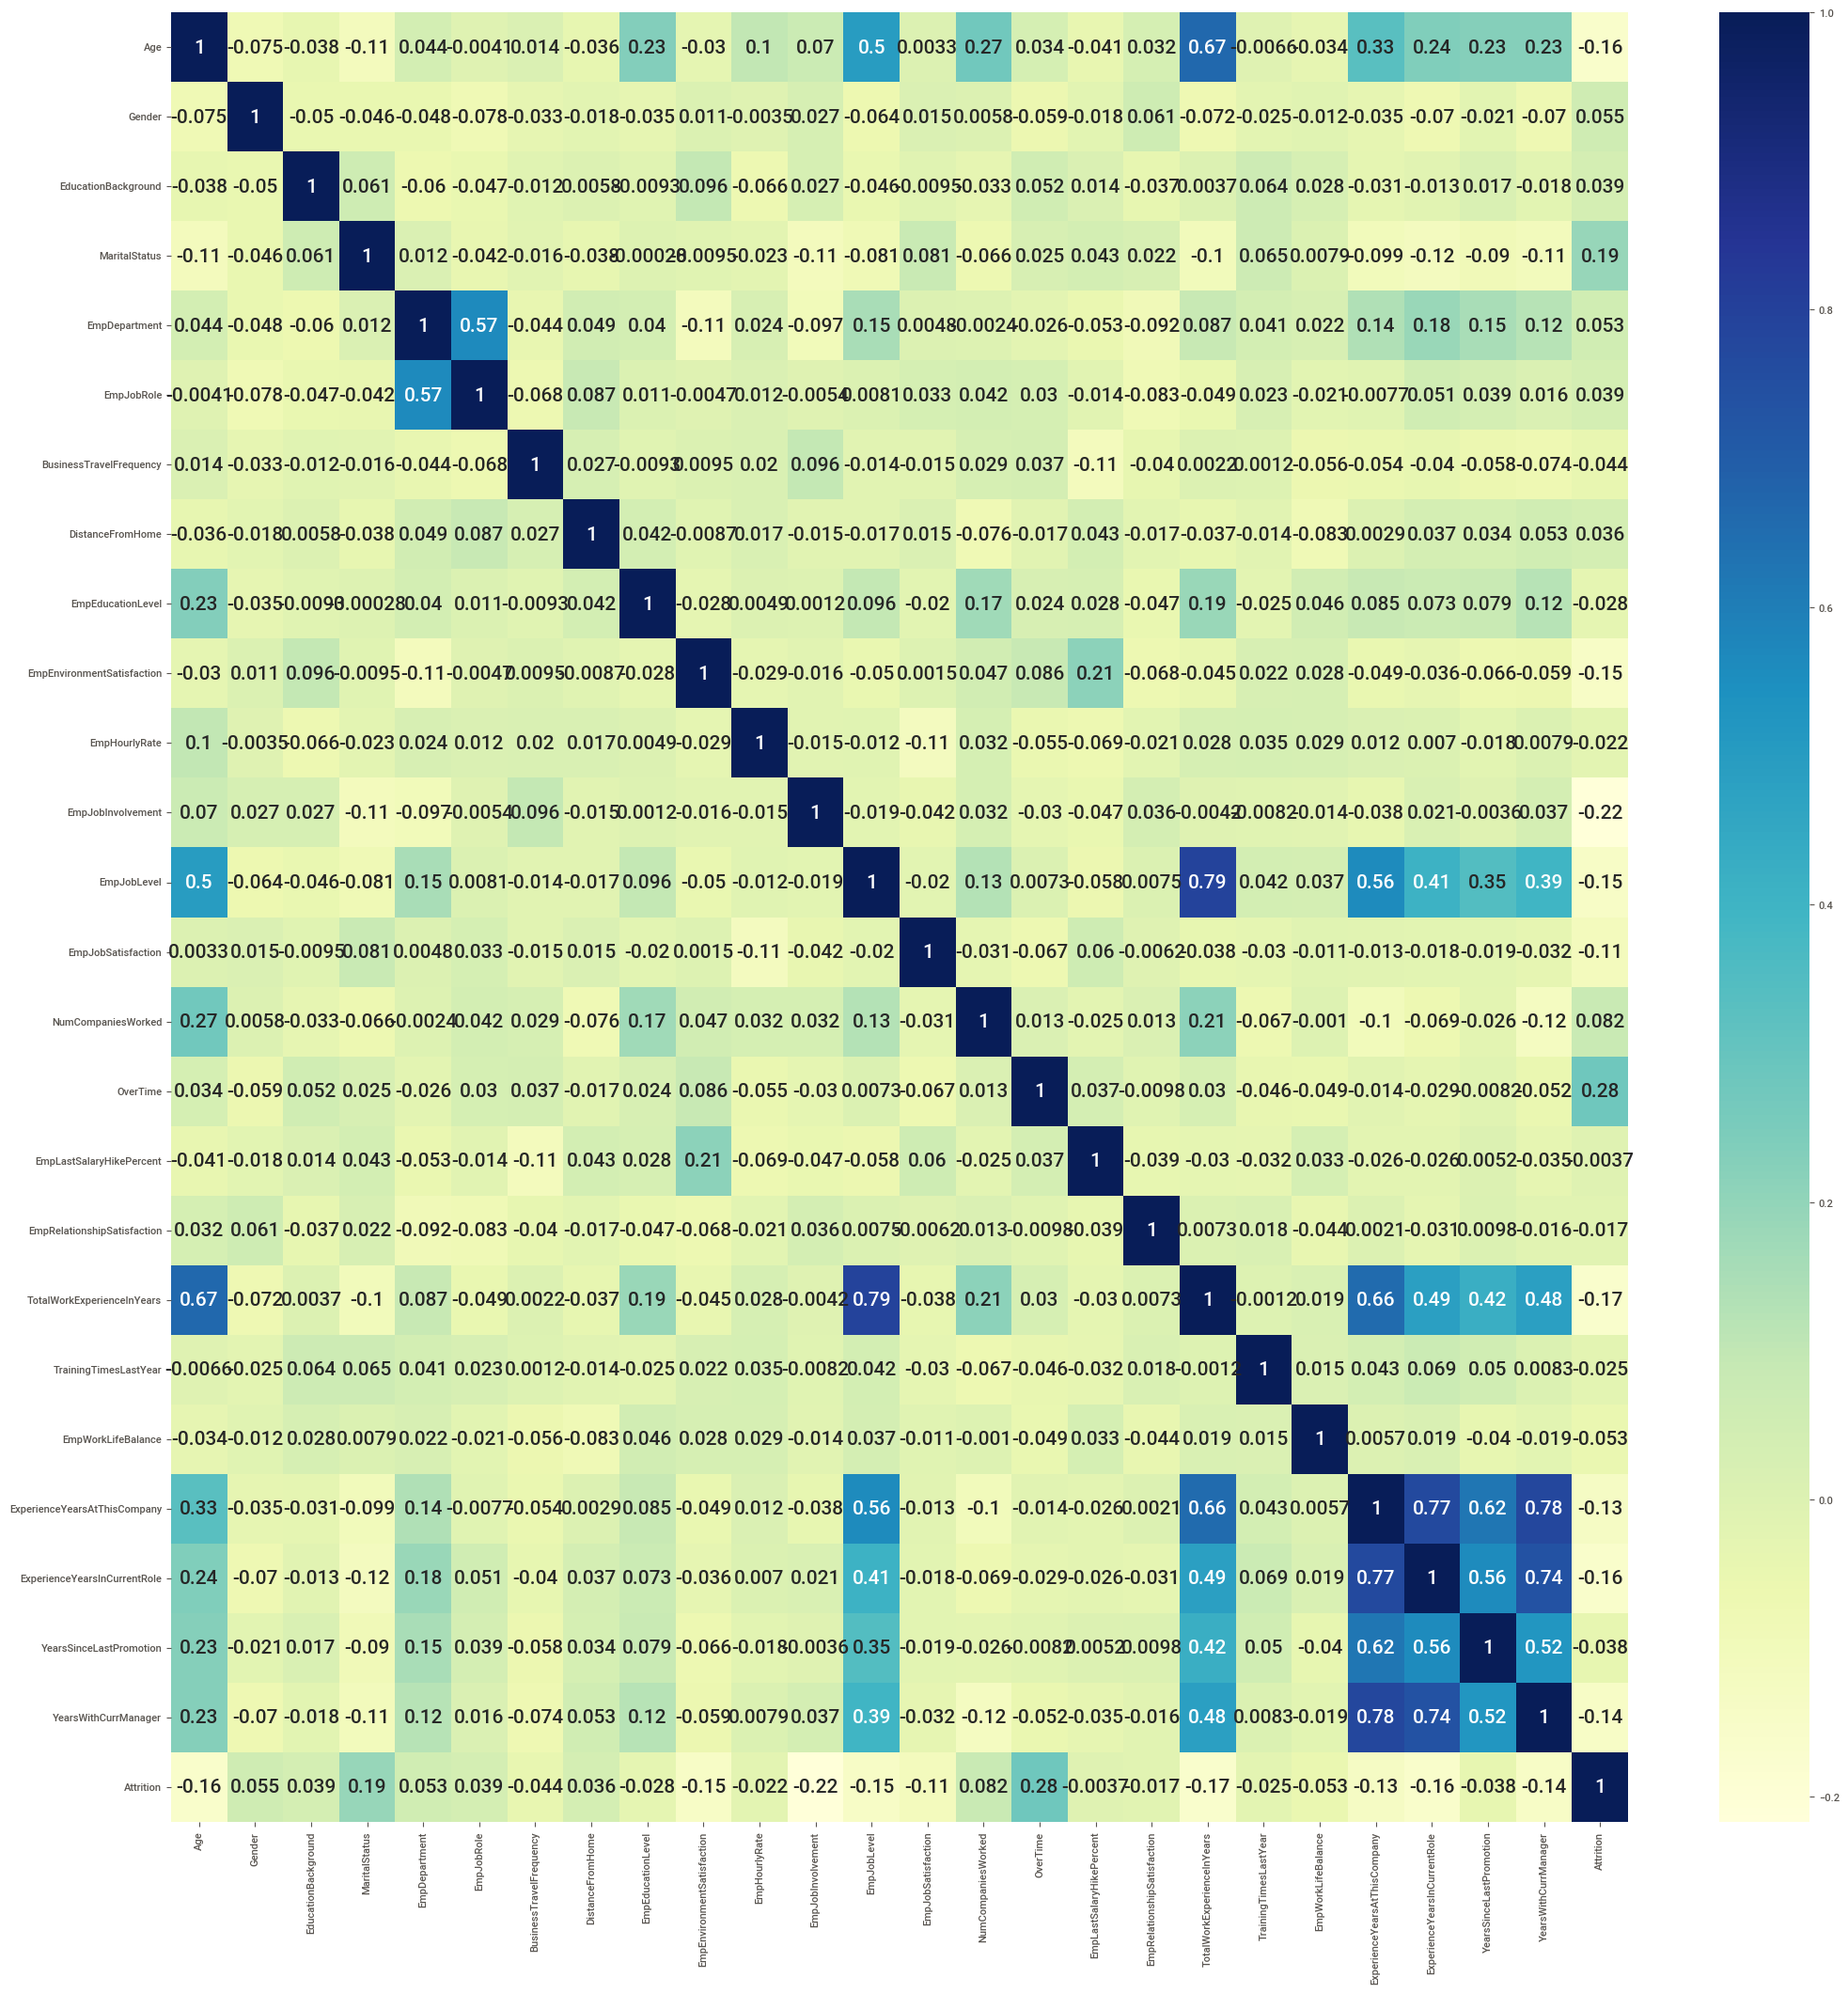

In [247]:
plt.figure(figsize=(25,25))
cor = X_over.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.YlGnBu)
plt.show()

In [248]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

Setting the threashold to find Highly correlation columns

In [249]:
corr_features = correlation(X_over, 0.9)
len(set(corr_features))

0

* None of the Columns are highly correlated

In [250]:
corr_features

set()

* correlation coefficient of "0" doesn't imply that there is no relationship at all between the factors, but rather that their relationship is not linear.

In [285]:
train = X_over
test = Y_over

In [316]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(train,test,random_state=42,test_size=0.2)

In [317]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_over.drop(corr_features,axis=1),Y_over)#fit train data

LogisticRegression()

**MODELLING:**

* We're going to try 6 different Machine Learning Model:

  * Logistic Regression

  * K-Nearest neighbours Classifer

  * RandomForestClassifer

  * SVC Classifier

  * XGBOOST Classifier

  * SGD Classifier
  
  * MUltilayer perceptron classifier

  * Gaussian NB

  

In [318]:
models = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier(),
    "SVC":SVC(),
    "Xgboost":XGBClassifier(),
    "SGD":SGDClassifier(),
    "NB":GaussianNB(),
    "MLP":MLPClassifier(),
    "Extra tree":ExtraTreesClassifier()}

In [319]:
from sklearn.metrics import accuracy_score

def fit_and_score(models, X_over, X_test, Y_over, Y_test):
    model_scores = {}
    for name, model in models.items():
        model.fit(X_over.drop(corr_features, axis=1), Y_over)
        y_pred = model.predict(X_test.drop(corr_features, axis=1))
        accuracy = accuracy_score(Y_test, y_pred)
        model_scores[name] = accuracy
    return model_scores

In [320]:
Y_over

0       1
1       1
2       2
3       1
4       1
       ..
2617    2
2618    2
2619    2
2620    2
2621    2
Name: PerformanceRating, Length: 2622, dtype: int64

In [305]:
%time


CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10 µs


In [321]:
model_scores = fit_and_score(models=models,
                             X_over=X_over,
                             X_test=X_test,
                             Y_over=Y_over,  # Correct the parameter name here
                             Y_test=Y_test)

In [322]:
model_scores

{'Logistic Regression': 0.76,
 'KNN': 0.878095238095238,
 'Random Forest': 1.0,
 'SVC': 0.6838095238095238,
 'Xgboost': 1.0,
 'SGD': 0.8076190476190476,
 'NB': 0.7714285714285715,
 'MLP': 0.9276190476190476,
 'Extra tree': 1.0}

* Visualizing and comparing the model

In [323]:
model_compare = pd.DataFrame(model_scores,index=['accuracy'])

* Visualization using plotly:

In [324]:
!pip install plotly

In [312]:
import plotly.graph_objects as go

In [313]:
model_names   = list(model_scores.keys())
metric_values = list(model_scores.values())

In [314]:
fig = go.Figure(data =[go.Bar(x=model_names,y=metric_values)])

In [315]:
fig

**HYPER** **TUNING**

* Logistic regression

In [325]:
# Creating a hyperparameter grid for LogisticRegression
log_reg_grid = {"C":np.logspace(-4,4,20),
                "solver":["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifer
rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf":np.arange(1,20,2)}

Now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [327]:
np.random.seed(42)

# setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LoisticRegression
rs_log_reg.fit(X_over.drop(corr_features,axis=1), Y_over)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [332]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 29.763514416313132}

In [333]:
rs_log_reg.score(X_test.drop(corr_features,axis=1),Y_test)

0.7961904761904762

After Tuning Logistic Regression, we got the best score as **0.79**

* K Nearest Neighbor

In [339]:
%time
# Let's Tune KNN

train_scores = []
test_scores = []

#create a list of different values of n_neighbours
neighbours = range(1,10)

# setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neigbours
for i in neighbours:
  knn.set_params(n_neighbors = i)

  # Fit the algorithm
  knn.fit(X_over.drop(corr_features,axis=1), Y_over)

  # Update the training score list
  train_scores.append(knn.score(X_over.drop(corr_features,axis=1),Y_over))

  # Update the test score list
  test_scores.append(knn.score(X_test.drop(corr_features,axis=1), Y_test))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.82 µs


In [340]:
train_scores

[1.0,
 0.9496567505720824,
 0.9309687261632341,
 0.8996948893974066,
 0.8848207475209764,
 0.851258581235698,
 0.8394355453852022,
 0.8196033562166285,
 0.8009153318077803]

In [341]:
test_scores

[1.0,
 0.9428571428571428,
 0.9219047619047619,
 0.8761904761904762,
 0.878095238095238,
 0.8419047619047619,
 0.8285714285714286,
 0.7961904761904762,
 0.7714285714285715]

Maximum KNN score on the test data: 1.0


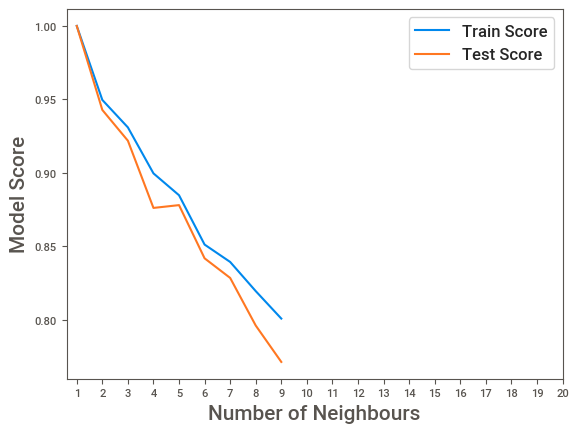

In [342]:
plt.plot(neighbours, train_scores, label = "Train Score")
plt.plot(neighbours, test_scores, label = "Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of Neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN score on the test data:",max(test_scores) )


* Stochastic Gradient Descent

In [343]:
loss = ['hinge', 'log', 'modified_huber', 'squared_hinge',
'perceptron']
penalty = ['l1', 'l2', 'elasticnet']
alpha = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
learning_rate = ['constant', 'optimal', 'invscaling', 'adaptive']

eta0 = [1, 10, 100]

In [344]:
param_distributions = dict(loss=loss,
penalty=penalty,
alpha=alpha,
learning_rate=learning_rate,

eta0=eta0)

 * Rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [345]:
np.random.seed(42)
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
random = RandomizedSearchCV(estimator=sgd,
param_distributions=param_distributions,
scoring='roc_auc',
verbose=1, n_jobs=-1,
n_iter=1000)

In [346]:
random_result = random.fit(X_over.drop(corr_features,axis=1), Y_over)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


In [347]:
random_result.best_params_

{'penalty': 'l1',
 'loss': 'log',
 'learning_rate': 'adaptive',
 'eta0': 100,
 'alpha': 0.0001}

In [348]:
np.random.seed(42)
sgd1=SGDClassifier(penalty='l2',
 loss = 'modified_huber',
 learning_rate = 'optimal',
 eta0 = 10,
 alpha = 1)

In [350]:
sgd1.fit(X_over.drop(corr_features,axis=1),Y_over)

SGDClassifier(alpha=1, eta0=10, loss='modified_huber')

In [351]:
sgd1.score(X_test.drop(corr_features,axis=1),Y_test)

0.7466666666666667

* After Tuned Stochastic Gradient Descent and got best score as **0.74** as **higher** than before tuning.

* Random Forest Classification

In [352]:
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
n_estimators

[200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

In [353]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = list(range(1,11))
min_samples_leaf = list(range(1,11))
bootstrap = [True, False]


params={
  'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap

}

In [354]:
np.random.seed(42)
RC1=RandomForestClassifier()

So now rather than doing hyperparamer tuning by hand or manully let's use RandomizedSearchCV

In [356]:
RS=RandomizedSearchCV(estimator=RC1, scoring='f1',param_distributions=params, n_iter=100, cv=3,
                               verbose=3, random_state=42, n_jobs=-1)

RS.fit(X_over.drop(corr_features,axis=1),Y_over)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, scoring='f1', verbose=3)

In [ ]:
 RS.best_estimator_

RandomForestClassifier(max_depth=80, min_samples_leaf=8, min_samples_split=10,
                       n_estimators=1200)

In [ ]:
RS.best_params_ #best_params

{'n_estimators': 1200,
 'min_samples_split': 10,
 'min_samples_leaf': 8,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}

In [ ]:
np.random.seed(42)
model_RC=RandomForestClassifier(max_features='sqrt', min_samples_leaf=1,max_depth= 10,
                       min_samples_split=2, n_estimators=1400,bootstrap=True) #fit with best_params
model_RC.fit(X_over.drop(corr_features,axis=1), Y_over)

RandomForestClassifier(max_depth=10, n_estimators=1400)

In [ ]:
model_RC.score(X_test.drop(corr_features,axis=1),Y_test)

0.925

* Support Vector Classification

In [ ]:
#Hyper params
params={'C':[0.1,0.2,1,10,100,1000,10000,100000],
         'gamma':[0.1,0.01,0.001,0.0001,0.00001]}

So now rather than doing hyperparamer tuning by hand or manully let's use GridSearchCV

In [ ]:
#GridSearchCV

svc_grid=GridSearchCV(SVC(random_state=42),params,scoring='f1',
    n_jobs=-1,
    refit=True,
    verbose=3,
    cv=3)
svc_grid.fit(X_over.drop(corr_features,axis=1), Y_over)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 0.2, 1, 10, 100, 1000, 10000, 100000],
                         'gamma': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
             scoring='f1', verbose=3)

In [ ]:
svc_grid.best_estimator_

SVC(C=0.1, gamma=0.1, random_state=42)

In [ ]:
svc_grid.best_params_

{'C': 0.1, 'gamma': 0.1}

In [ ]:
svc_best_params=SVC(C=1000, gamma=0.001, random_state=42,verbose=3)

In [ ]:
svc_best_params

SVC(C=1000, gamma=0.001, random_state=42, verbose=3)

In [ ]:
svc_best_params.fit(X_over.drop(corr_features,axis=1), Y_over)

[LibSVM]

SVC(C=1000, gamma=0.001, random_state=42, verbose=3)

In [ ]:
svc_best_params.score(X_test.drop(corr_features,axis=1),go.YAxis_test)

0.7583333333333333

* XGBOOST Classification

In [362]:
params_xg={
    'gamma':[x for x in np.linspace(0,100,1000)],
    'max_depth':[int(x) for x in range(1,11)],

    'n_estimators':[int(x) for x in np.arange(1,200)],
    'learning_rate':[0.01,0.02,0.03,0.05,0.1,0.2,0.300000012,0.4,0.5]
}

In [363]:
np.random.seed(42)
XG=XGBClassifier()

So now rather than doing hyperparamer tuning by hand or manully let's use `RandomizedSearchCV`

In [364]:
Xg_RS=RandomizedSearchCV(estimator=XG, scoring='f1',param_distributions=params_xg, n_iter=100, cv=3,
                               verbose=3, random_state=42, n_jobs=-1)

Xg_RS.fit(X_over.drop(corr_features,axis=1), Y_over)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                                  2.4024024024024024,
                                                  2.5025025025025025,
                                                  2.6026026026026026,
                                                  2.702702702702703,
                                                  2.802802802802803,
                                                  2.902902902902903, ...],
                                        'learning_rate': [0.01, 0.02, 0.03,
                                                          0.05, 0.1, 0.2,
                                                          0.300000012, 0.4,
                                                          0.5],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8,
                                                         9, 10, 11, 12, 13, 14,
                                                         15, 16, 17, 18, 19, 20,
                                                         21, 22, 23, 24, 25, 26,
                                                         27, 28, 29, 30, ...]},
                   random_state=42, scoring='f1', verbose=3)

In [365]:
Xg_RS.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=89.8898898898899, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.2, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=155, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob',
              predictor=None, ...)

In [366]:
Xg_RS.best_params_

{'n_estimators': 155,
 'max_depth': 7,
 'learning_rate': 0.2,
 'gamma': 89.8898898898899}

# Result :

* PROJECT SUMMARY:

  * **Department wise performance**

    * Sales:  Performance is more in the sales department. The male performance rating is good compared to female.
    * Human Resources: Employees who are elder are performing low in this department.
    * Development:  Employees of all age are belongs from excellent performance.
    
     The gender-based performance is nearly same for both.
    * Data Science:  Data science is the only department where only few good performers are found.
    * The age does not count as an important factor in their performance.

    * Research & Development: The age factor is not deviating from the level of performance here where different employees with different age are there in every level of performance.

   * Finance: The finance department performance is exponentially decreasing when age increases.
    
     The male employees are doing good.
     
     The experience factor is inversely relating to the performance level.

  * **Recommendations to improve the employee performance**

    *  The company needs to focus more on the **employee environment satisfaction**.
    * The **salary hike** will give the boost to the employees to perform well financially.
   * The **promotion** will help the employees to achieve more performance by giving the chance to be more responsible and leadership qualities.

   The development and sales department is having an overall higher performance comparing to rest of the departments.


**Conclusion** :
  *  From the above result table , we can conclude that multilayer perceptron classifier  gives high accuracy of **0.94**.
  * Thus we conclude that our model **multilayer perceptron classifier** performed with an accuracy of **94%**, which is the best fit model for employee performance.

* FACTORS AFFECTING EMPLOYEES PERFORMANCE:

  * Employment Environment Satisfaction

  * Employee Salary Hike Percentage

  * Experience Years In CurrentRole



## THANK YOU ##